# Assignment Day 2
---

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import count
from pandas.core.window import Rolling
%matplotlib inline
#plt.style.use('fivethirtyeight')
plt.style.use('bmh')

## Part 1a
## Discovering Point Anomalies with K-means Clustering

Using the **wine_parvus.csv** file perform the following:

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [3]:
dataset = pd.read_csv('../datasets/wine_parvus.csv')

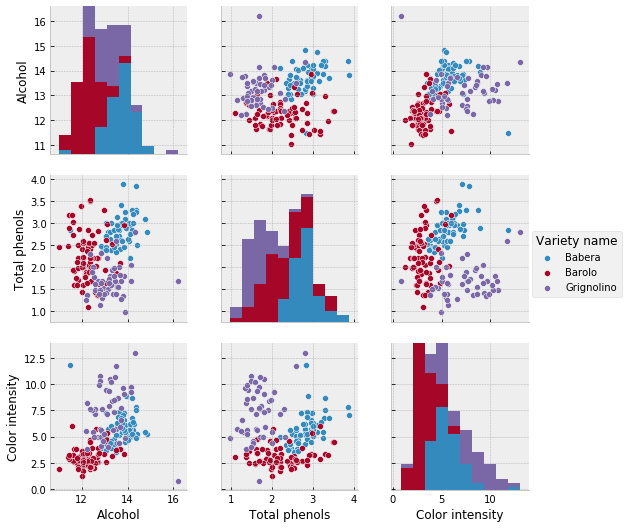

In [4]:
sns.pairplot(dataset[['Alcohol','Total phenols','Color intensity','Variety name']], 
             hue ='Variety name')

In [5]:
K = int(np.sqrt(len(dataset) / 2.0))

In [6]:
X = dataset.loc[:,"Alcohol":]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = KMeans(n_clusters = K)
clusters = model.fit_predict(X_scaled)

In [7]:
dataset['cluster_id'] = clusters
dataset.groupby('cluster_id').count()['Variety'].reset_index()

,cluster_id,Variety
0,0,4
1,1,35
2,2,30
3,3,25
4,4,14
5,5,22
6,6,16
7,7,16
8,8,18


In [8]:
median = dataset['Alcohol'].median()
alcohol_cat = []
for i in dataset['Alcohol']:
    if i > median:
        alcohol_cat.append("high")
    else:
        alcohol_cat.append("low")
dataset['alcohol_cat'] = alcohol_cat

In [9]:
groups = dataset.groupby(['cluster_id','alcohol_cat']).count()['Variety'].reset_index()
groups.columns = ['cluster_id','alcohol_cat','count']

In [10]:
anomalies = groups[groups['count'] == 1]
anomalies

,cluster_id,alcohol_cat,count
14,7,low,1


In [11]:
g1 = anomalies.iloc[:,0].values
g2 = anomalies.iloc[:,1].values

In [12]:
anomalies_df = pd.DataFrame()
for i, j in zip(g1, g2):
    anomalies_df = anomalies_df.append(dataset[
        (dataset['cluster_id'] == i) & (dataset['alcohol_cat'] == j)])

In [13]:
anomalies_df

,Variety,Variety name,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster_id,alcohol_cat
45,1,Babera,13.05,1.77,2.1,17.0,107.0,3.0,3.0,0.28,2.03,5.04,0.88,3.35,885.0,7,low


In [14]:
dataset['anomaly'] = [1 if i in anomalies_df.index else 0 for i in dataset.index]   

Text(0.5,1,'Anomalies')

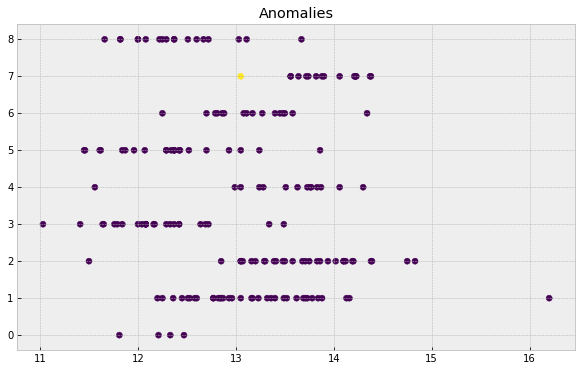

In [15]:
plt.figure(figsize=[10, 6])
plt.scatter(dataset['Alcohol'], dataset['cluster_id'], c=dataset['anomaly'])
plt.title('Anomalies')

## Part 1b
## Pointing criminallity outliers

Using the **crime_population_netherlands.csv** file perform the following:

In [16]:
dataset = pd.read_csv('../datasets/crime_population_netherlands.csv')
X = dataset.loc[:,"Undermining public order":]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
scores = []
for K in range(2, 30):
    model = KMeans(n_clusters = K)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

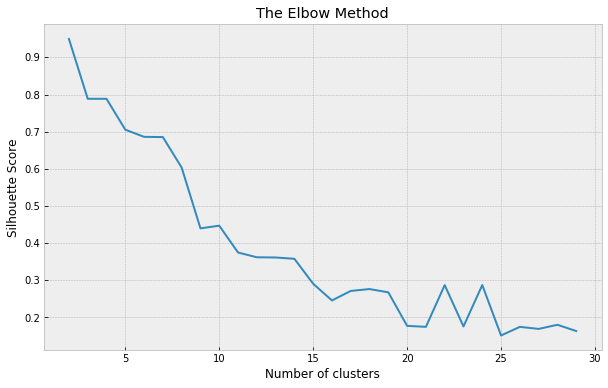

In [18]:
plt.figure(figsize=[10, 6])
plt.plot(range(2, 30), scores)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [19]:
model_best = KMeans(n_clusters = 20)
clusters_best = model_best.fit_predict(X_scaled)
dataset['cluster_best_id'] = clusters_best

In [20]:
groups = dataset.groupby('cluster_best_id').count()['CBScode'].reset_index()
groups.columns = ['cluster_best_id','count']
anomalies = groups[groups['count'] == 1]
anomalies

,cluster_best_id,count
1,1,1
3,3,1
4,4,1
6,6,1
8,8,1
9,9,1
17,17,1
18,18,1


In [21]:
anomalies_df = pd.DataFrame()
for i in anomalies.cluster_best_id:
    anomalies_df = anomalies_df.append(dataset[(dataset['cluster_best_id'] == i)])

dataset['anomaly'] = [1 if i in anomalies_df.index else 0 for i in dataset.index]   

In [22]:
anomalies_df

,CBScode,Municipality,Province,Population,Population_density(p/km),"HIC: Theft / burglary dwelling, complete","HIC: Theft / burglary dwelling, attempts",HIC: Violent Crime,HIC: Street Roof,HIC: Robberies,...,Theft / burglary garage / barn / shed,Drug trafficking,Trespassing,mistreatment,Overt violence (person),Or destruction. cause damage,Arms Trade,pickpocketing,morals Felony,cluster_best_id
279,GM0599,Rotterdam,South Holland,618467,2952,1942,948,5503,624,125,...,997,941,121,2839,403,4837,528,1869,421,1
15,GM0363,Amsterdam,North Holland,853312,4767,2962,1351,7645,1331,176,...,974,1293,265,4356,272,4956,556,8009,530,3
325,GM0344,Utrecht,Utrecht,328577,3353,1177,474,1820,140,22,...,331,239,124,1058,114,2029,103,802,149,4
127,GM0518,"Hague, TheThe Hague",South Holland,508592,6131,1462,807,3996,242,44,...,582,666,106,2306,90,3820,294,1588,287,6
99,GM0153,Enschede,Overijssel,158542,1121,607,176,834,17,23,...,262,157,21,471,45,1115,104,130,74,8
95,GM0772,Eindhoven,North Brabant,220782,2476,713,265,1717,96,25,...,350,189,60,1023,127,1821,57,1232,160,9
119,GM0014,Groningen,Groningen,198108,2474,696,181,1454,46,16,...,253,184,59,906,46,1506,50,574,171,17
184,GM0080,Leeuwarden,Friesland,108113,713,418,187,675,21,5,...,143,61,69,397,26,752,36,83,87,18


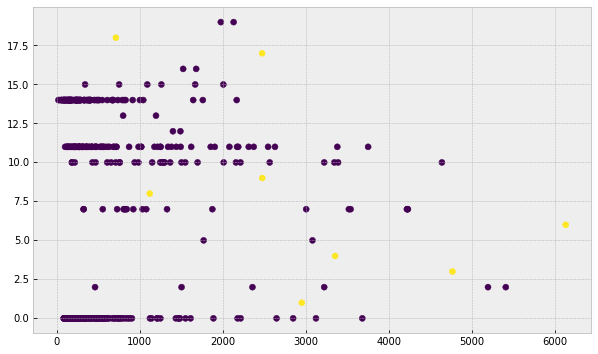

In [23]:
plt.figure(figsize=[10, 6])
plt.scatter(dataset['Population_density(p/km)'], dataset['cluster_best_id'], c=dataset['anomaly'])

---
## Part 2
## Anomalies in test answering

Using the **ms_experiments.csv** file perform the following:

In [24]:
dataset = pd.read_csv('../datasets/ms_experiment.csv')
dataset.describe()

,correct.answers,ms,response_ms,trial
count,11420.000000,11420.000000,11420.000000,11420.000000
mean,48.789229,0.694921,1837.626182,24.561559
std,8.862138,0.460461,631.816594,14.717046
min,13.000000,0.000000,80.000000,1.000000
25%,42.000000,0.000000,1445.000000,12.000000
50%,49.000000,1.000000,1712.000000,24.000000
75%,55.000000,1.000000,2082.000000,36.000000
max,67.000000,1.000000,20649.000000,61.000000


In [25]:
X = dataset[['response_ms','trial']]
X_scaled = StandardScaler().fit_transform(X)
model = DBSCAN(eps=1, min_samples = 2)
clusters = model.fit_predict(X_scaled)

In [26]:
set(clusters)

{-1, 0, 1}

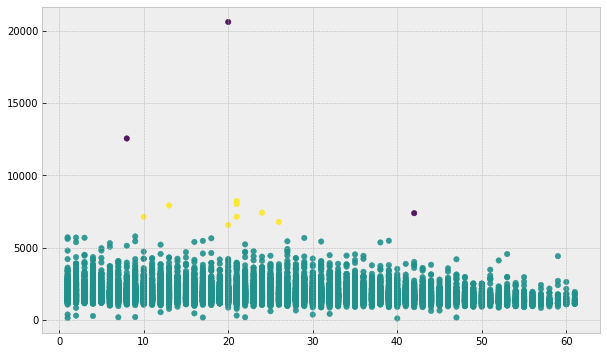

In [27]:
plt.figure(figsize=[10, 6])
plt.scatter(X['trial'], X['response_ms'], s=30, alpha=0.9, c=clusters)

---
The `Timestamp()` function from pandas is very useful since converts a date string into a timestamp object.  
Example:

In [28]:
import pandas as pd
value = '2017-05-31 18:12:55.637' 
value_in_timestamp = pd.Timestamp(value)

This helps when you want to access the date elements

In [29]:
value_in_timestamp.year

2017

---

In [30]:
dataset['timestamp'] = dataset.timestamp.map(pd.Timestamp)
day_cat = []
for i in dataset.timestamp:
    if i.hour < 12:
        day_cat.append("morning")
    elif i.hour > 18:
        day_cat.append("evening")
    else:
        day_cat.append("afternoon")
dataset['day_cat'] = day_cat

In [31]:
ms_mor = dataset.query("ms == 1 and day_cat == 'morning'")
ms_aft = dataset.query("ms == 1 and day_cat == 'afternoon'")
ms_eve = dataset.query("ms == 1 and day_cat == 'evening'")
hc_mor = dataset.query("ms == 0 and day_cat == 'morning'")
hc_aft = dataset.query("ms == 0 and day_cat == 'afternoon'")
hc_eve = dataset.query("ms == 0 and day_cat == 'evening'")

In [32]:
context_groups = {
 'ms_mor': ms_mor, 'ms_aft': ms_aft, 'ms_eve': ms_eve, 'hc_mor': hc_mor, 'hc_aft': hc_aft, 'hc_eve': hc_eve,}

In [33]:
parameters = []
for subset in context_groups.values():
    X = subset[['response_ms','trial']]
    X_scaled = StandardScaler().fit_transform(X)
    anomalies = []
    for e in np.arange(0.1, 1, 0.01):
        for m in range(1,10):
            model = DBSCAN(eps=e, min_samples = m)
            clusters = model.fit_predict(X_scaled)
            unique, counts = np.unique(clusters, return_counts=True)
            anomalies.append((e,m,counts[0]))
    grid_table = pd.DataFrame(anomalies)
    grid_table.columns = ['eps','min_neigh','noise']
    expected = int(round(len(context_groups['ms_mor'])*(1-.954),0))
    grid_table_exp = grid_table[grid_table.noise < expected]
    parameters.append((grid_table_exp['eps'].mean(), round(grid_table_exp['min_neigh'].mean(),0)))

In [34]:
parameters_table = pd.DataFrame(parameters)
parameters_table.index = list(context_groups.keys())
parameters_table.columns = ['eps','min_neigh']

In [35]:
parameters_table

,eps,min_neigh
ms_mor,0.596164,5.0
ms_aft,0.592274,5.0
ms_eve,0.582979,5.0
hc_mor,0.589426,5.0
hc_aft,0.586442,5.0
hc_eve,0.588918,5.0


In [37]:
parameters_table.index

Index(['ms_mor', 'ms_aft', 'ms_eve', 'hc_mor', 'hc_aft', 'hc_eve'], dtype='object')

In [38]:
anomalies_tables = []
indexes = []
for df in parameters_table.index:
    data_group = context_groups[str(df)]
    X = data_group[['response_ms','trial']]
    X_scaled = StandardScaler().fit_transform(X)
    model = DBSCAN(eps=parameters_table.loc[df][0], min_samples = parameters_table.loc[df][1])
    clusters = model.fit_predict(X_scaled)
    data_group['cluster_id'] = clusters
    cluster_group = data_group.groupby('cluster_id').count()['_id'].reset_index()
    cluster_group.columns = ['cluster_id','count']
    anomalies_tables.append({df: cluster_group})
    indexes.append(data_group[data_group['cluster_id'] == -1].index)

In [39]:
anomalies_tables[0]['ms_mor']

,cluster_id,count
0,-1,22
1,0,2277


In [40]:
anomalies_tables[1]['ms_aft']

,cluster_id,count
0,-1,12
1,0,3392


In [41]:
anomalies_tables[2]['ms_eve']

,cluster_id,count
0,-1,17
1,0,2216


In [42]:
anomalies_tables[3]['hc_mor']

,cluster_id,count
0,-1,7
1,0,1534


In [43]:
anomalies_tables[4]['hc_aft']

,cluster_id,count
0,-1,9
1,0,981


In [44]:
anomalies_tables[5]['hc_eve']

,cluster_id,count
0,-1,9
1,0,944


In [45]:
indxs = [item for s in indexes for item in s]

In [46]:
distraction_point = []
for i in dataset.index:
    if i in indxs:
        distraction_point.append(1)
    else:
        distraction_point.append(0)

In [47]:
dataset['distraction_point'] = distraction_point

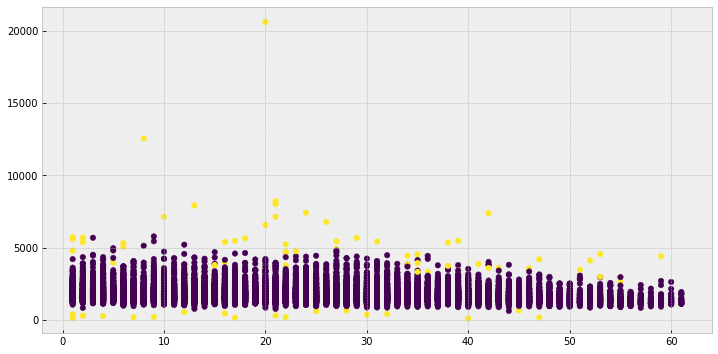

In [51]:
plt.figure(figsize=[12, 6])
plt.scatter(dataset['trial'], dataset['response_ms'], s=30, alpha=1, c=dataset['distraction_point'])

/Users/pedrohserrano/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pedrohserrano/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


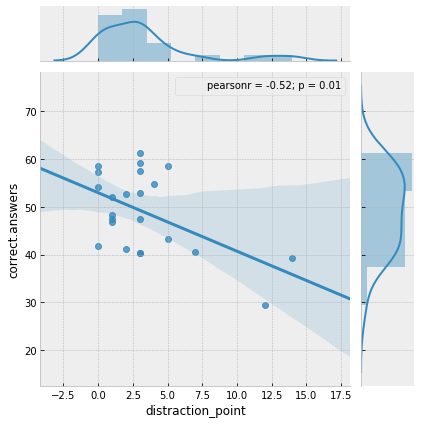

In [62]:
sns.jointplot(dataset.groupby('userId').sum()['distraction_point'],
             dataset.groupby('userId').mean()['correct.answers'], kind="reg")

## Part 3
## Anomalies Detection on Health Insurance Claims

Using the **hospit-days.csv** file perform the following:

In [63]:
df = pd.read_csv("../datasets/hospit_days.csv", sep=';')

In [64]:
df.head()

,In,Out,Days
0,01/01/2000,01/01/2000,0
1,01/01/2000,01/01/2000,0
2,01/01/2000,01/01/2000,0
3,01/01/2000,02/01/2000,1
4,01/01/2000,02/01/2000,1


In [65]:
df.sort_values(['Days'], ascending=False).head(10)

,In,Out,Days
70633,13/03/2014,26/11/2014,258
28915,09/01/2006,20/08/2006,223
82545,02/08/2016,01/03/2017,211
1238,26/03/2000,19/10/2000,207
83745,12/11/2016,28/05/2017,197
60586,03/03/2012,20/08/2012,170
28633,20/12/2005,14/01/2006,25
27106,25/08/2005,19/09/2005,25
10110,02/12/2001,27/12/2001,25
78434,30/08/2015,24/09/2015,25


In [66]:
df['In'] = df['In'].map(pd.Timestamp)
df['Out'] = df['Out'].map(pd.Timestamp)

In [67]:
dfy = df.groupby(df['In'].map(lambda x: x.year)).mean()

In [68]:
dfy.head(10)

,Days
In,
2000,1.997479
2001,2.860689
2002,1.880566
2003,2.512938
2004,2.450731
2005,3.287137
2006,3.074313
2007,3.034554
2008,2.892401


In [69]:
df[df['Days'] > 365].count()

In      0
Out     0
Days    0
dtype: int64

In [70]:
two_dev = int(2*df['Days'].std())
two_dev

5

In [71]:
df_ = df[df['Days'] < two_dev]
df_.count()

In      81127
Out     81127
Days    81127
dtype: int64

In [72]:
df_.count()[0]/df.count()[0]

0.905981283362741

Which type of additional information or variables would we need to create contextual groups?
- Type of disease
- Type of claim
- Age
- Location

In [73]:
df['year_month'] = df['In'].dt.to_period("M")
dfm = df.groupby('year_month').mean()

In [74]:
dfm.head(10)

,Days
year_month,
2000-01,2.113684
2000-02,2.156716
2000-03,2.339806
2000-04,1.982843
2000-05,2.067720
2000-06,1.764706
2000-07,2.075426
2000-08,1.770302
2000-09,1.956098


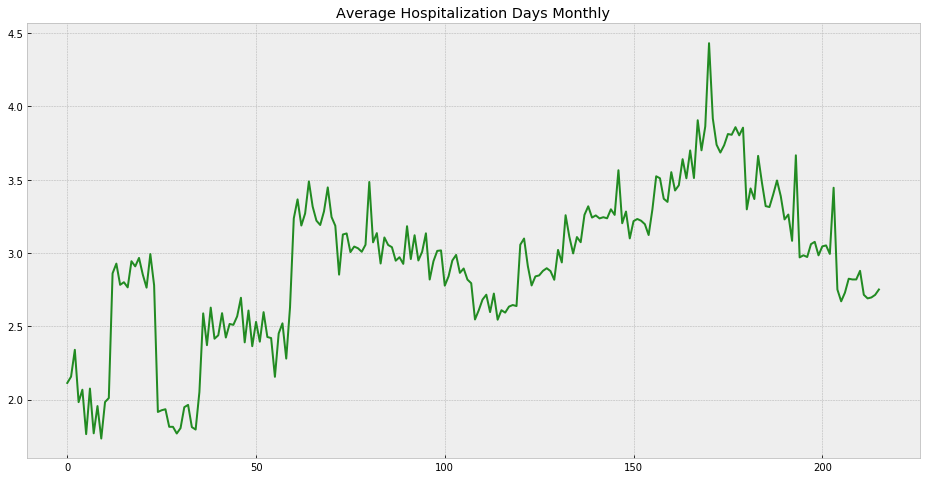

In [75]:
plt.figure(figsize=(16, 8))
plt.title("Average Hospitalization Days Monthly")
plt.plot(range(len(dfm)), dfm['Days'], '-', c='forestgreen')

In [76]:
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

In [77]:
def explain_anomalies(y, window_size, sigma=1.0):
    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    std = np.std(residual)
    return {'standard_deviation': round(std, 3),
            'anomalies_dict': {index: y_i for index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))}}

In [78]:
def explain_anomalies_rolling_std(y, window_size, sigma=1.0):
    avg = moving_average(y, window_size)
    avg_list = list(avg)#.tolist()
    residual = y - avg
    testing_std = Rolling(residual, window_size).std()
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = list(testing_std_as_df.replace(np.nan, testing_std_as_df.iloc[window_size - 1]).round(3).iloc[:,0])#.tolist()
    std = np.std(residual)
    return {'stationary standard_deviation': round(std, 3),
            'anomalies_dict': {index: y_i for index, y_i, avg_i, rs_i in zip(count(), y, avg_list, rolling_std)
              if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))}}

In [79]:
# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1, text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.", alpha=0.4, c='blue')
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, len(y))
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.scatter(x_anomaly, y_anomaly, s=50, c='red')
    plt.grid(True)
    plt.show()

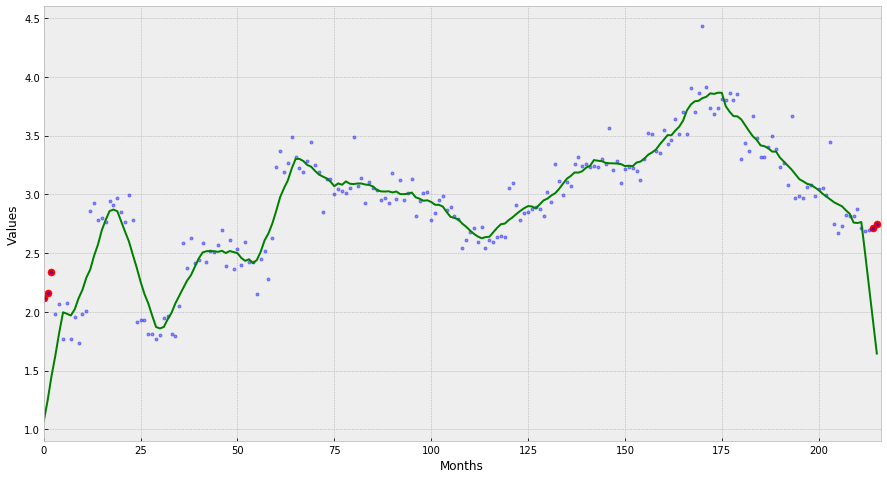

In [80]:
plot_results(range(len(dfm.index)), 
             y=dfm['Days'], 
             window_size=10, 
             text_xlabel="Months", 
             sigma_value=3, 
             text_ylabel="Values")

In [81]:
events = explain_anomalies(dfm['Days'], window_size=4, sigma=2)

print("Information about the anomalies model:{}".format(events))

Information about the anomalies model:{'standard_deviation': 0.157, 'anomalies_dict': {0: 2.1136842105263156, 1: 2.156716417910448, 12: 2.8617021276595747, 24: 1.9160671462829737, 36: 2.588390501319261, 60: 3.236220472440945, 80: 3.484725050916497, 170: 4.431492842535787, 193: 3.6666666666666665, 203: 3.4453781512605044, 215: 2.751336898395722}}


In [82]:
events['anomalies_dict']

{0: 2.1136842105263156,
 1: 2.156716417910448,
 12: 2.8617021276595747,
 24: 1.9160671462829737,
 36: 2.588390501319261,
 60: 3.236220472440945,
 80: 3.484725050916497,
 170: 4.431492842535787,
 193: 3.6666666666666665,
 203: 3.4453781512605044,
 215: 2.751336898395722}

In [83]:
events_std = explain_anomalies_rolling_std(dfm['Days'], window_size=4, sigma=2)

print("Information about the anomalies model:{}".format(events_std))

Information about the anomalies model:{'stationary standard_deviation': 0.157, 'anomalies_dict': {0: 2.1136842105263156, 46: 2.694915254237288, 79: 3.0564853556485354, 143: 3.2369791666666665}}
